<a href="https://colab.research.google.com/github/kdzioba/matplotlib/blob/main/Example%20charts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import numpy as np

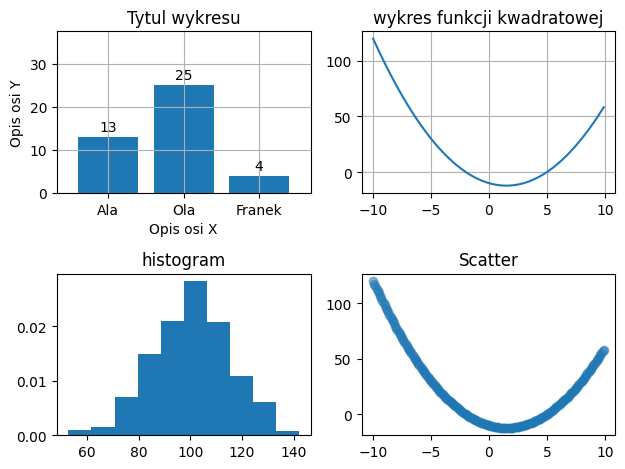

In [55]:
fig, ax=plt.subplots(2,2)

x=['Ala',"Ola",'Franek']
y=[13,25,4]

res=ax[0][0].bar(x,y)

#add values descriptions
for itm in res:
  height=itm.get_height()
  ax[0][0].annotate('{}'.format(height), xy=(itm.get_x()+itm.get_width()/2,height),xytext=(0,2),textcoords="offset points",ha='center',va='bottom')

ax[0][0].set(xlabel="Opis osi X",ylabel="Opis osi Y",title="Tytul wykresu",xmargin=0.1,ymargin=0.5)

#add grid
ax[0][0].grid()



#drugi wykres
x1=np.arange(-10,10,0.1)
y1=x1**2-3*x1-10

ax[0][1].set(title='wykres funkcji kwadratowej')
ax[0][1].plot(x1,y1)
ax[0][1].grid()


#hisogram
np.random.seed(19680801)

# example data
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(437)

num_bins = 10


# the histogram of the data
ax[1][0].hist(x, num_bins, density=True)
ax[1][0].set(title='histogram')


#scatter
ax[1][1].scatter(x1,y1,alpha=0.5)
ax[1][1].set(title="Scatter")


fig.tight_layout()

#show plot
plt.show()

Line Plot

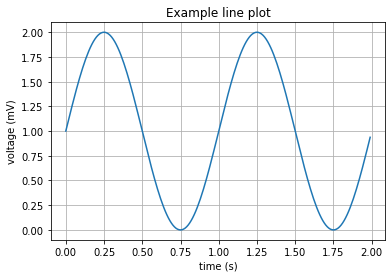

In [ ]:
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='Example line plot')
ax.grid()

plt.show()

Multiple subplots in one figure

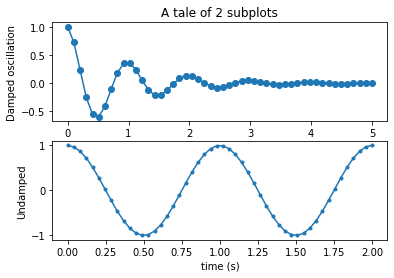

In [ ]:
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'o-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(2, 1, 2)
plt.plot(x2, y2, '.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.show()

# PColorMeshe

Basic

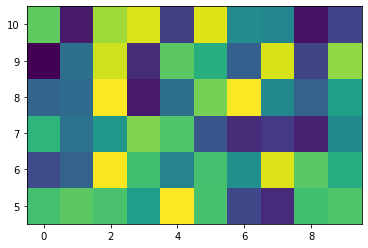

In [ ]:
np.random.seed(19680801)
Z = np.random.rand(6, 10)
x = np.arange(-0.5, 10, 1)  # len = 11
y = np.arange(4.5, 11, 1)  # len = 7

fig, ax = plt.subplots()
ax.pcolormesh(x, y,Z)

Non-rectilinear pcolormesh

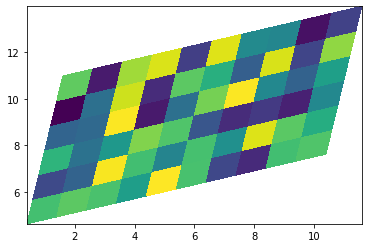

In [ ]:
x = np.arange(-0.5, 10, 1)  # len = 11
y = np.arange(4.5, 11, 1)  # len = 7
X, Y = np.meshgrid(x, y)
X = X + 0.2 * Y  # tilt the coordinates.
Y = Y + 0.3 * X

fig, ax = plt.subplots()
ax.pcolormesh(X, Y, Z)

Centered Coordinates

Text(0.5, 1.0, "shading='flat'")

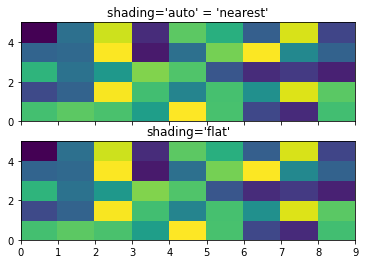

In [ ]:
x = np.arange(10)  # len = 10
y = np.arange(6)  # len = 6
X, Y = np.meshgrid(x, y)

fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)
axs[0].pcolormesh(X, Y, Z, vmin=np.min(Z), vmax=np.max(Z), shading='auto')
axs[0].set_title("shading='auto' = 'nearest'")
axs[1].pcolormesh(X, Y, Z, vmin=np.min(Z), vmax=np.max(Z), shading='flat')
axs[1].set_title("shading='flat'")

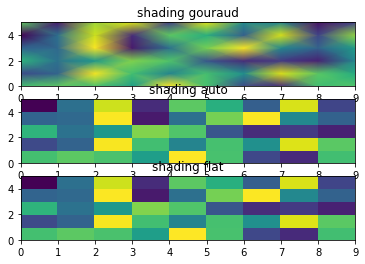

In [ ]:
plt.subplot(3,1,1)
plt.pcolormesh(X,Y,Z,vmin=np.min(Z),vmax=np.max(Z),shading='gouraud')
plt.title('shading gouraud')
plt.subplot(3,1,2)
plt.pcolormesh(X,Y,Z,vmin=np.min(Z),vmax=np.max(Z),shading='auto')
plt.title('shading auto')
plt.subplot(3,1,3)
plt.pcolormesh(X,Y,Z,vmin=np.min(Z),vmax=np.max(Z),shading='flat')
plt.title('shading flat')

plt.show()

# Histograms

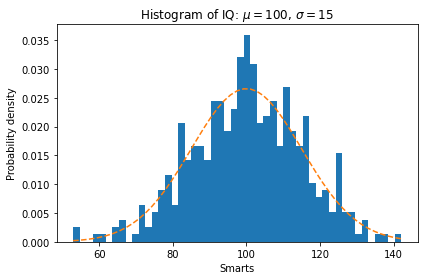

In [ ]:
np.random.seed(19680801)

# example data
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(437)

num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=True)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

# Paths

In [ ]:
import matplotlib.path as mpath
import matplotlib.patches as mpatches

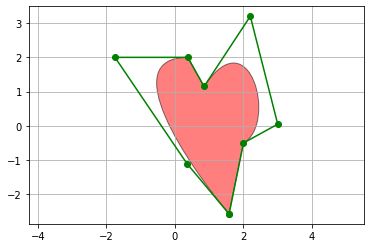

In [ ]:
fig, ax = plt.subplots()

Path = mpath.Path
path_data = [
    (Path.MOVETO, (1.58, -2.57)),
    (Path.CURVE4, (0.35, -1.1)),
    (Path.CURVE4, (-1.75, 2.0)),
    (Path.CURVE4, (0.375, 2.0)),
    (Path.LINETO, (0.85, 1.15)),
    (Path.CURVE4, (2.2, 3.2)),
    (Path.CURVE4, (3, 0.05)),
    (Path.CURVE4, (2.0, -0.5)),
    (Path.CLOSEPOLY, (1.58, -2.57)),
    ]
codes, verts = zip(*path_data)
path = mpath.Path(verts, codes)
patch = mpatches.PathPatch(path, facecolor='r', alpha=0.5)
ax.add_patch(patch)

# plot control points and connecting lines
x, y = zip(*path.vertices)
line, = ax.plot(x, y, 'go-')

ax.grid()
ax.axis('equal')
plt.show()

# 3d Plotting

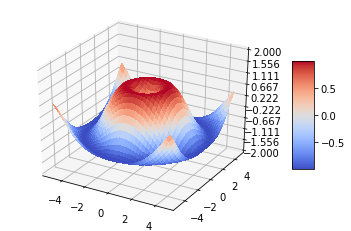

In [4]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-2, 2)
ax.zaxis.set_major_locator(LinearLocator(10))


# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

# Bar charts

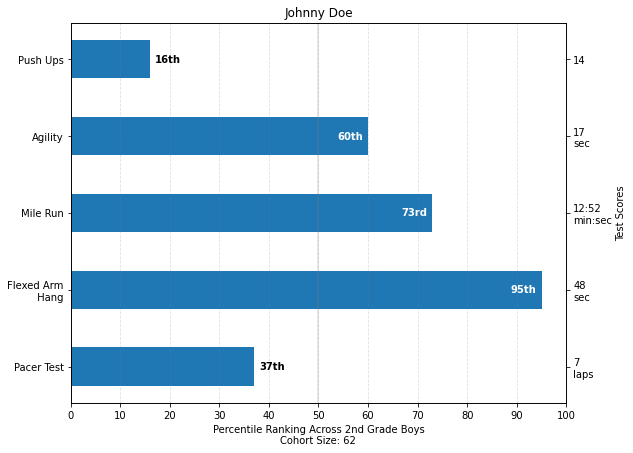

In [5]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

np.random.seed(42)

Student = namedtuple('Student', ['name', 'grade', 'gender'])
Score = namedtuple('Score', ['score', 'percentile'])

# GLOBAL CONSTANTS
test_names = ['Pacer Test', 'Flexed Arm\n Hang', 'Mile Run', 'Agility',
              'Push Ups']
test_units = dict(zip(test_names, ['laps', 'sec', 'min:sec', 'sec', '']))


def attach_ordinal(num):
    """Convert an integer to an ordinal string, e.g. 2 -> '2nd'."""
    suffixes = {str(i): v
                for i, v in enumerate(['th', 'st', 'nd', 'rd', 'th',
                                       'th', 'th', 'th', 'th', 'th'])}
    v = str(num)
    # special case early teens
    if v in {'11', '12', '13'}:
        return v + 'th'
    return v + suffixes[v[-1]]


def format_score(score, test):
    """
    Create score labels for the right y-axis as the test name followed by the
    measurement unit (if any), split over two lines.
    """
    unit = test_units[test]
    if unit:
        return f'{score}\n{unit}'
    else:  # If no unit, don't include a newline, so that label stays centered.
        return score


def format_ycursor(y):
    y = int(y)
    if y < 0 or y >= len(test_names):
        return ''
    else:
        return test_names[y]


def plot_student_results(student, scores, cohort_size):
    fig, ax1 = plt.subplots(figsize=(9, 7))  # Create the figure
    fig.subplots_adjust(left=0.115, right=0.88)
    fig.canvas.set_window_title('Eldorado K-8 Fitness Chart')

    pos = np.arange(len(test_names))

    rects = ax1.barh(pos, [scores[k].percentile for k in test_names],
                     align='center',
                     height=0.5,
                     tick_label=test_names)

    ax1.set_title(student.name)

    ax1.set_xlim([0, 100])
    ax1.xaxis.set_major_locator(MaxNLocator(11))
    ax1.xaxis.grid(True, linestyle='--', which='major',
                   color='grey', alpha=.25)

    # Plot a solid vertical gridline to highlight the median position
    ax1.axvline(50, color='grey', alpha=0.25)

    # Set the right-hand Y-axis ticks and labels
    ax2 = ax1.twinx()

    # Set the tick locations
    ax2.set_yticks(pos)
    # Set equal limits on both yaxis so that the ticks line up
    ax2.set_ylim(ax1.get_ylim())

    # Set the tick labels
    ax2.set_yticklabels([format_score(scores[k].score, k) for k in test_names])

    ax2.set_ylabel('Test Scores')

    xlabel = ('Percentile Ranking Across {grade} Grade {gender}s\n'
              'Cohort Size: {cohort_size}')
    ax1.set_xlabel(xlabel.format(grade=attach_ordinal(student.grade),
                                 gender=student.gender.title(),
                                 cohort_size=cohort_size))

    rect_labels = []
    # Lastly, write in the ranking inside each bar to aid in interpretation
    for rect in rects:
        # Rectangle widths are already integer-valued but are floating
        # type, so it helps to remove the trailing decimal point and 0 by
        # converting width to int type
        width = int(rect.get_width())

        rank_str = attach_ordinal(width)
        # The bars aren't wide enough to print the ranking inside
        if width < 40:
            # Shift the text to the right side of the right edge
            xloc = 5
            # Black against white background
            clr = 'black'
            align = 'left'
        else:
            # Shift the text to the left side of the right edge
            xloc = -5
            # White on magenta
            clr = 'white'
            align = 'right'

        # Center the text vertically in the bar
        yloc = rect.get_y() + rect.get_height() / 2
        label = ax1.annotate(
            rank_str, xy=(width, yloc), xytext=(xloc, 0),
            textcoords="offset points",
            horizontalalignment=align, verticalalignment='center',
            color=clr, weight='bold', clip_on=True)
        rect_labels.append(label)

    # Make the interactive mouse over give the bar title
    ax2.fmt_ydata = format_ycursor
    # Return all of the artists created
    return {'fig': fig,
            'ax': ax1,
            'ax_right': ax2,
            'bars': rects,
            'perc_labels': rect_labels}


student = Student('Johnny Doe', 2, 'boy')
scores = dict(zip(
    test_names,
    (Score(v, p) for v, p in
     zip(['7', '48', '12:52', '17', '14'],
         np.round(np.random.uniform(0, 100, len(test_names)), 0)))))
cohort_size = 62  # The number of other 2nd grade boys

arts = plot_student_results(student, scores, cohort_size)
plt.show()

grouped bar charts

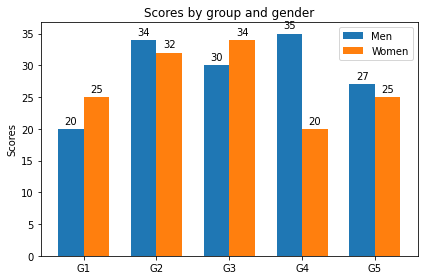

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

chorizontal bar chart

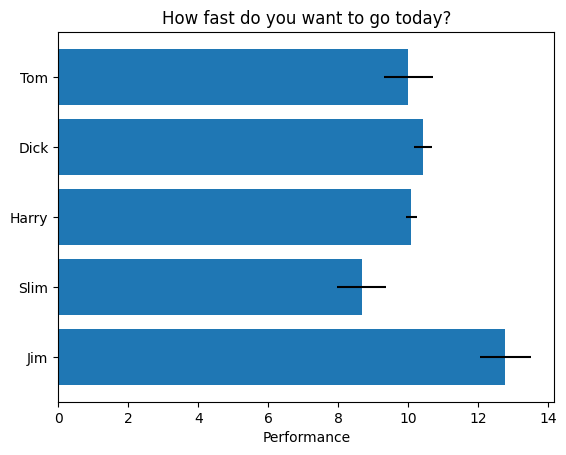

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()